# Random Sample Generation and Probability Distributions

In [310]:
%matplotlib inline
import matplotlib.pyplot as plt

In [311]:
import numpy as np

## Notations/Formulas from Probability & Statistics

Mean and Variance of a discrete random varaible $X$ whose probability is given by $p_i = P(X = x_i)$
$$
    \mathbb{E}[X] = \sum_i p(x_i) x_i \\
    \mathbb{E}[(X- \mu)^2] = \sum_i p(x_i) (x_i - \mu)^2
$$

## Gaussian Distribution

- PDF (Probability Density Function) is given by
$$
    p(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp\bigg\{-\frac{1}{2}\frac{(x-m)^2)}{\sigma^2}\bigg\}
$$
- CDF (Cumulative distribution function) is given by
$$
    Prob[X<x_0] = \int_{-\infty}^{x_0} p(x) dx
$$

In [312]:
mean = 0
std = 1
N = 100000

In [313]:
x = np.random.normal(mean, std, N)
x.shape, x[:10]

((100000,),
 array([ 0.31480474,  0.45259513, -1.0672565 , -1.7826313 ,  0.97636155,
        -0.13837   ,  0.70235576, -1.80516526,  0.51877736,  0.85702127]))

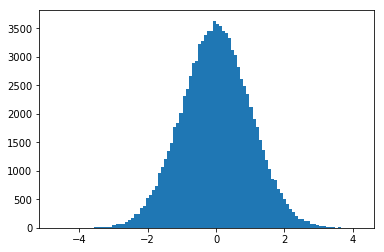

In [314]:
h = plt.hist (x, bins=100)

In [318]:
len(h), h[0].shape, h[1].shape

(3, (100,), (101,))

In [319]:
h[0][:10], h[1][:10]

(array([1., 0., 0., 0., 1., 0., 1., 0., 1., 2.]),
 array([-4.72086596, -4.63185294, -4.54283991, -4.45382689, -4.36481386,
        -4.27580084, -4.18678781, -4.09777479, -4.00876176, -3.91974874]))

#### The frequency for the bins is recorded in h[0]

In [320]:
freq = h[0]
domain = h[1]

Text(0.5, 1.0, 'frequency plot (histogram)')

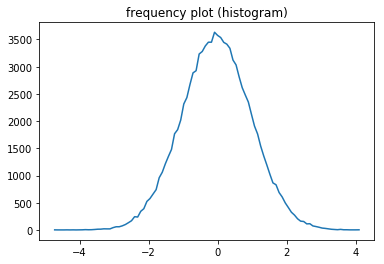

In [322]:
plt.plot (domain[:-1], freq)
plt.title ('frequency plot (histogram)')

Notice that the $x$-axis shows a difference range. It is the number of items in the arrqy `freq`

### Cumulative Frequency Computation

In [325]:
cumfreq = np.zeros_like (freq)
cumfreq[0] = freq[0]
for i in range(1, cumfreq.size):
    cumfreq[i] = cumfreq[i-1] + freq[i]
print ('The last term of CF must be equal to N :', cumfreq[-1] == N)

The last term of CF must be equal to N : True


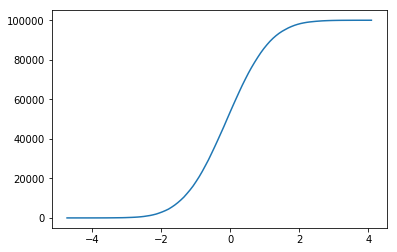

In [326]:
plt.plot (domain[:-1], cumfreq)

In [327]:
normalized_cumfreq = cumfreq / N

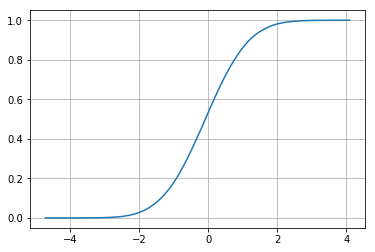

In [328]:
plt.plot (domain[:-1], normalized_cumfreq)
plt.grid(True)

### Samples from the standard normal distribution can also be obtained by `np.random.randn(size)`

In [329]:
y = np.random.randn(N)
y.shape, y[:10]

((100000,),
 array([-0.31329134, -2.63140592, -1.23474596, -0.01313144, -0.10537773,
        -0.45738744, -0.51444531, -1.35063085,  0.10636782,  1.1631891 ]))

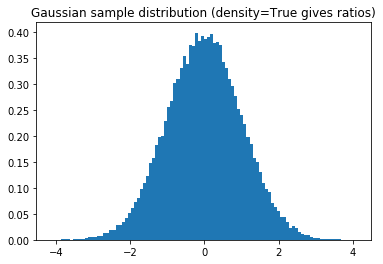

In [330]:
h = plt.hist (y, bins=100, density=True)
_ = plt.title ('Gaussian sample distribution (density=True gives ratios)')

#### Cumulative Frequence

In [339]:
def cumfreq(f, density=False):
    cdf = np.zeros_like (f)
    cdf[0] = f[0]
    for i in range(1, cdf.size):
        cdf[i] = cdf[i-1] + f[i]
    #
    if density:
        cdf /= cdf[-1]
    #
    return cdf

## Random Integer Generation

In [350]:
xint = np.random.randint(10, high=100, size=1000000)

histogram bin size =  101


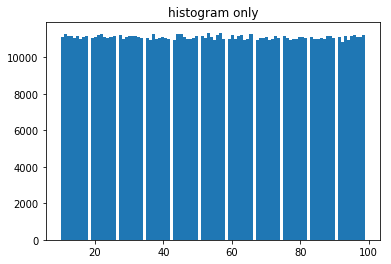

In [354]:
h = plt.hist(xint, bins=100, histtype='stepfilled')
plt.title ('histogram only')
print ('histogram bin size = ', h[1].size)

Text(0.5, 1.0, 'histogram normalized == sample density')

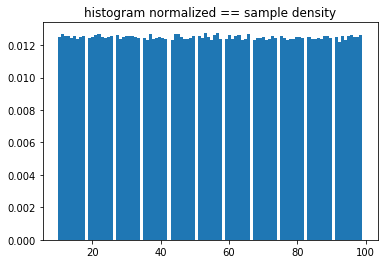

In [355]:
h = plt.hist(xint, bins=100, histtype='stepfilled', density=True)
plt.title ('histogram normalized == sample density')

In [357]:
h[0][:10]

array([0.0125236 , 0.01269101, 0.01257303, 0.0125618 , 0.01241236,
       0.01254607, 0.01237865, 0.01246966, 0.01258315, 0.        ])

Text(0.5, 1.0, 'cdf of uniform integers [0,100)')

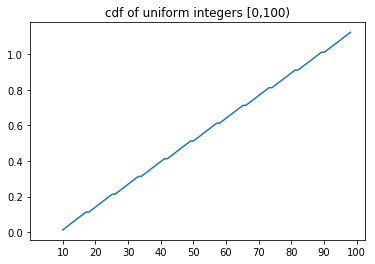

In [375]:
freq = h[0] # this is already normalized. So, the cumulative plot will have 1 at the last index
cdf = cumfreq (freq)
plt.plot (h[1][:-1], cdf)
plt.xlim(left=0)
plt.xticks(np.arange(10, 110, 10))
plt.title ('cdf of uniform integers [0,100)')

#### Histogram using `np.unique()`

In [376]:
unique, count = np.unique(xint, return_counts=True)

Text(0.5, 1.0, 'histogram of intger samples from 10 to 99')

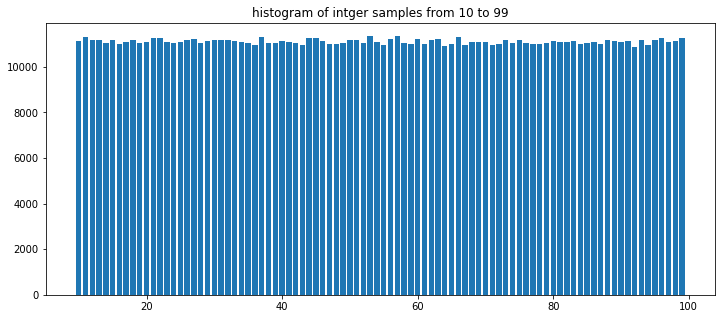

In [377]:
plt.figure(figsize=(12, 5))
plt.bar (unique, count)
plt.title ('histogram of intger samples from 10 to 99')

Text(0.5, 1.0, 'sample density from the integer samples [10, 99] or [10, 100) ')

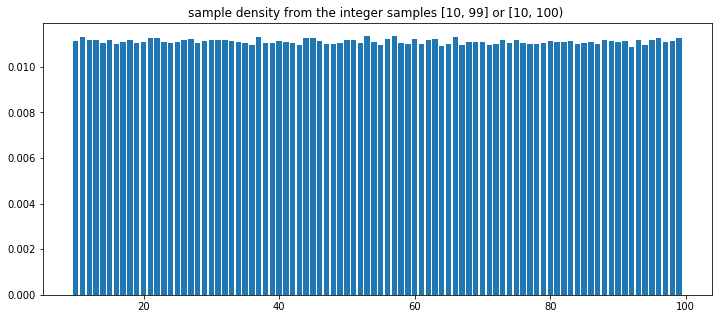

In [378]:
plt.figure(figsize=(12, 5))
plt.bar (unique, count/xint.shape[0])
plt.title ('sample density from the integer samples [10, 99] or [10, 100) ')

## Bernoulli Distribution
- https://en.wikipedia.org/wiki/Bernoulli_distribution

- Parameter
$$ Pr(X = 1) = p $$

- Probability Mass  Function (PMF) 
$$
   Pr(X = y) = p^y (1 - p)^{(1-y)}, \quad y \in \{ 0, 1 \}
$$

In [379]:
ntrial = 1
p = 0.3

# To examine the outpus
x = np.random.binomial(ntrial, p, 100)
x

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0])

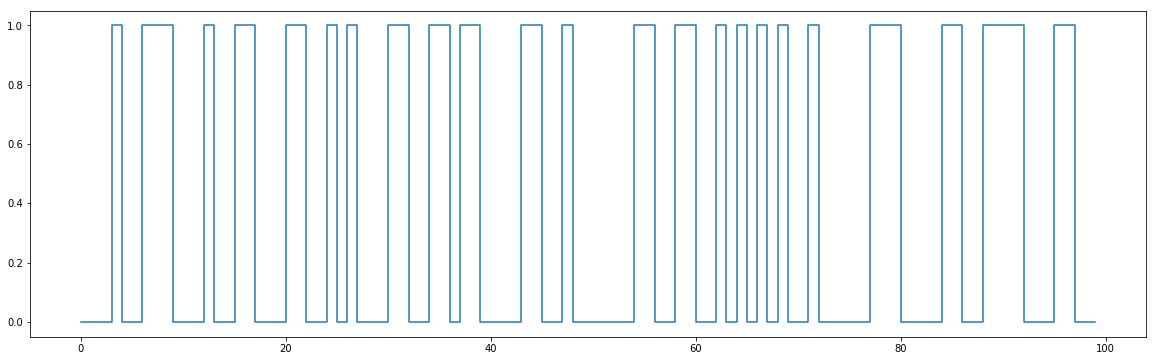

In [380]:
plt.figure(figsize=(20,6))
plt.plot (x, drawstyle='steps')

In [387]:
x = np.random.binomial (ntrial, p, 100000)

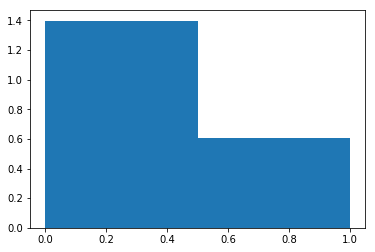

In [390]:
h = plt.hist (x, bins=2, density=True)

In [391]:
h[0], h[1]

(array([1.397, 0.603]), array([0. , 0.5, 1. ]))

## Binomial Distribution
- https://en.wikipedia.org/wiki/Binomial_distribution
    - In general, if the random variable X follows the binomial distribution with parameters n ∈ ℕ and p ∈ [0,1], we write $X \sim B(n, p)$.
    
- PMF
$$
    Pr(X = k) = {n \choose k} p^k (1-p)^{n-k}
$$

In [392]:
ntrial = 100
p = 0.3

xbino = np.random.binomial(n=ntrial, p=p, size=1000)

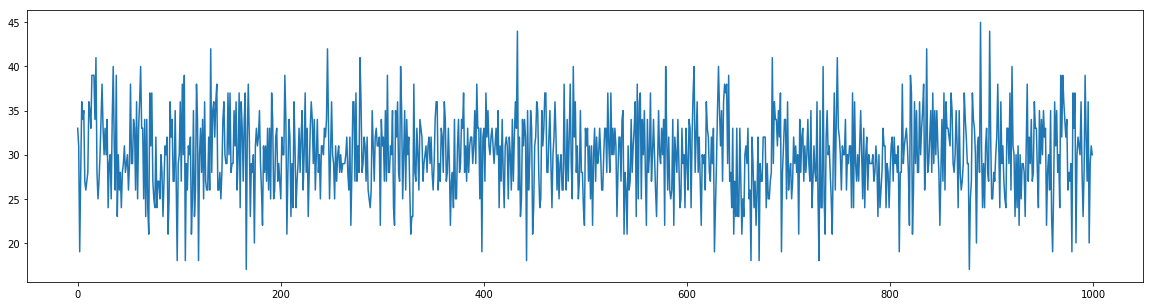

In [393]:
plt.figure (figsize=(20,5))
h = plt.plot (xbino)

In [430]:
# summary of the generated numbers
np.unique (xbino)

array([ 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53])

In [431]:
xbino = np.random.binomial (n=ntrial, p=p, size=1000000)

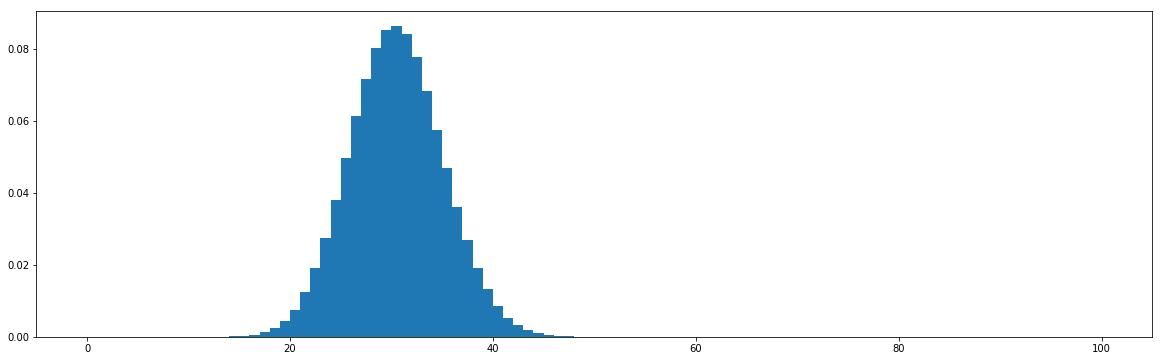

In [396]:
bins = [i for i in range(101)] # discrete bins

plt.figure (figsize=(20,6))
h = plt.hist (xbino, bins=bins, density=True, histtype='stepfilled')

<BarContainer object of 100 artists>

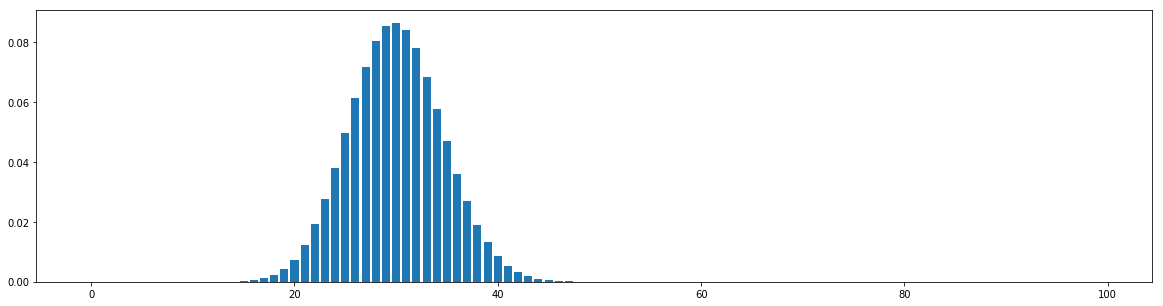

In [397]:
xcoord = [i for i in range(h[0].size)]

plt.figure (figsize=(20,5))
plt.bar (xcoord, h[0])

### Histogram with `np.unique()`

In [458]:
unique, counts = np.unique (xbino, return_counts=True)
unique, counts

(array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
        26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
        43, 44, 45, 46, 47, 48, 49, 50, 51, 52]),
 array([    2,     3,     4,    10,    57,    95,   249,   567,  1165,
         2462,  4383,  7676, 12301, 19033, 28045, 37921, 49345, 61436,
        71998, 80350, 85764, 86960, 83598, 77278, 68459, 57882, 46915,
        35964, 26795, 19400, 13088,  8397,  5262,  3191,  1847,  1034,
          529,   281,   130,    78,    25,    14,     6,     1]))

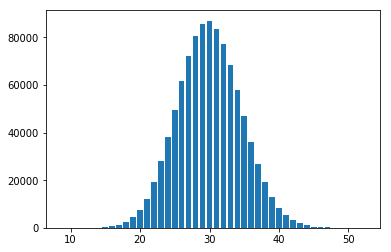

In [459]:
_ = plt.bar (unique, counts)

Text(0.5, 1.0, 'sample distribution from binomial(ntrial=100, p=0.3)')

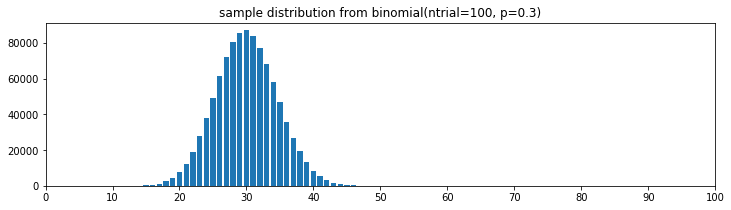

In [460]:
plt.figure (figsize=(12,3))
plt.bar (unique, counts)
plt.xticks (np.arange(start=0, stop=ntrial+1, step=10))
plt.title ('sample distribution from binomial(ntrial={}, p={})'.format(ntrial, p))

#### Sample CDF

In [463]:
cdf = np.zeros_like (counts)
cdf[0] = counts[0]
for i in range(1, unique.shape[0]):
    cdf[i] += cdf[i-1] + counts[i]

Text(0.5, 1.0, 'Cumulative disribution of samples from binomial(ntrial=100, p=0.3)')

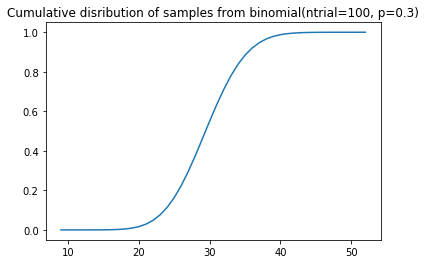

In [468]:
plt.plot (unique, cdf/cdf[-1])
plt.title ('Cumulative disribution of samples from binomial(ntrial={}, p={})'.format(ntrial, p))

## Histogram for Discrete Variables using python dictionary

In [469]:
xbino.min(), xbino.max()

(9, 52)

### Use dictionary object for histogram data

In [471]:
hist = { i : 0 for i in range (xbino.min(), xbino.max()+1, 1) }
for n in xbino:
    hist[n] += 1

In [475]:
hist.keys()

dict_keys([9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52])

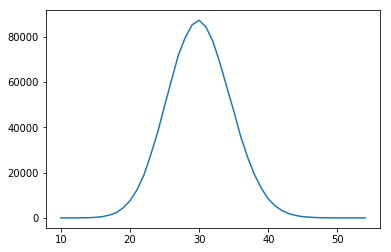

In [252]:
# with proper x-range
plt.plot(hist.keys(), hist.values())

<BarContainer object of 44 artists>

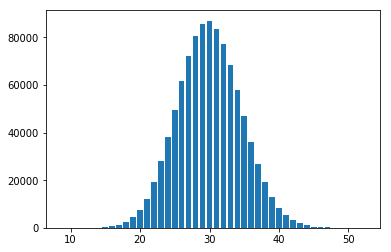

In [476]:
plt.bar (x=hist.keys(), height=hist.values())

## scipy.stats
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cumfreq.html

In [477]:
import scipy.stats

In [478]:
samples = np.random.randn (1000)

res = scipy.stats.cumfreq (samples)
x = res.lowerlimit + np.linspace(0, res.binsize * res.cumcount.size, res.cumcount.size)

Text(0.5, 1.0, 'Cumulative histogram')

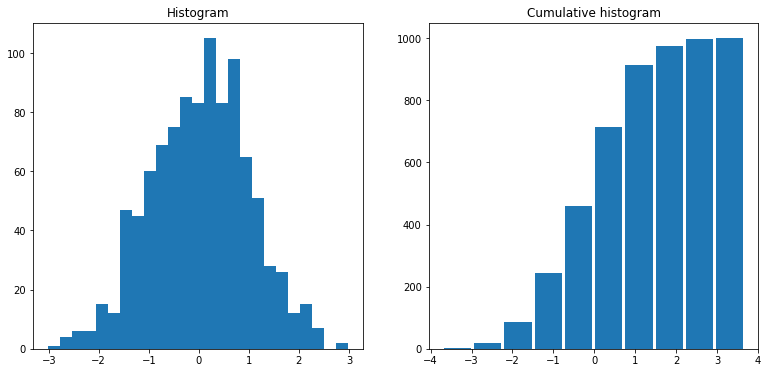

In [479]:
fig = plt.figure (figsize=(13,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist (samples, bins=25)
ax1.set_title ('Histogram')
ax2.bar (x, res.cumcount, width=res.binsize)
ax2.set_title ('Cumulative histogram')
#ax2.set_xlim ([x.min(), x.max()])

## (extra) How many times will a fair die land on the same number (e.g. 5) out of 100 trials.
    - use 'np.random.binomial(n=100, p=1/6., size=N)` to generate the samples.
    - base event set = { face is 5, face is not 5 }, so it is binary. (the same applies to other numbers each)

In [480]:
import numpy as np
import matplotlib.pyplot as plt

# great seed
np.random.seed(1337)

In [481]:
# how many times will a fair die land on the same number out of 100 trials.
data = np.random.binomial(n=100, p=1/6, size=1000)

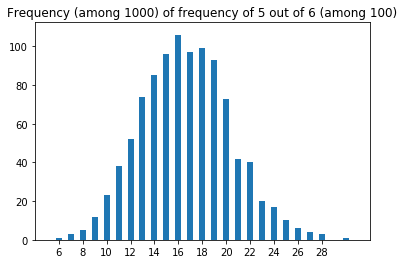

In [484]:
values, counts = np.unique(data, return_counts=True) # can be used to construct a histogram of discrete dataset

plt.vlines(values, 0, counts, color='C0', lw=6)

plt.title ('Frequency (among 1000) of frequency of 5 out of 6 (among 100)')
# optionally set y-axis up nicely
plt.ylim(0, max(counts) * 1.06)
plt.xlim(values.min()-2, values.max()+2)
_ = plt.xticks(values[::2])

In [486]:
print ('Sample mean says that 5 will appear {} times on average out of 100 trials'.format(data.mean()))

Sample mean says that 5 will appear 16.651 times on average out of 100 trials


In [488]:
print ('Sample probability: p = ', data.mean() / 100, '\nNotice: True p = ', 1/6)

Sample probability: p =  0.16651 
Notice: True p =  0.16666666666666666


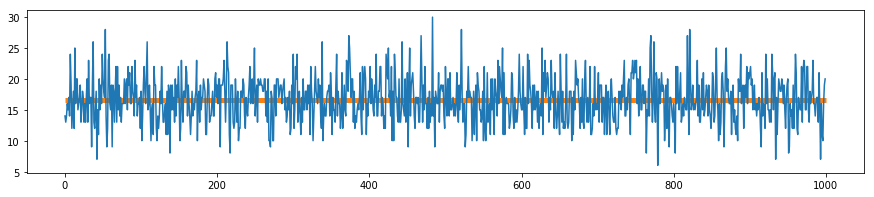

In [489]:
plt.figure(figsize=(15,3))
plt.hlines(data.mean(), xmin=0, xmax=data.size, color='C1', lw=5)
_ = plt.plot (data)

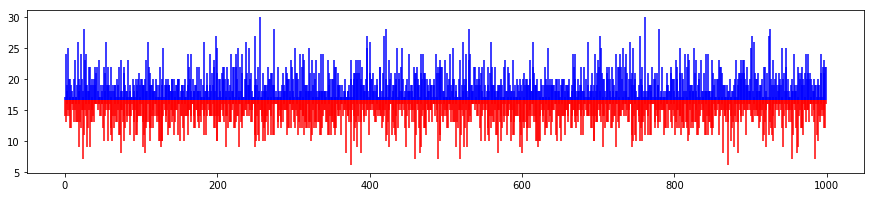

In [490]:
plt.figure(figsize=(15,3))
plt.vlines (np.arange(data.size), data.mean(), data[data>data.mean()], color='b')
plt.vlines (np.arange(data.size), data.mean(), data[data<=data.mean()], color='r')

## END